In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
cars = pd.read_csv("C:/Users/abhin/Downloads/CarPrices/CarPrice_Assignment.csv")

In [159]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [160]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [161]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [162]:
cars.info()
#this indicates there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [163]:
# #getting car company name from car name as it might be an important feature for the price 
# df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0])
# df.head()

In [164]:
# Dropping car name as we have extracted the company name
if 'car_ID' in cars.columns and 'CarName' in cars.columns:
    cars.drop(['car_ID', 'CarName'], axis=1, inplace=True)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [165]:
#reduction in dimension
cars = cars[['horsepower','enginesize','cylindernumber','drivewheel','carlength','carwidth','highwaympg','wheelbase',
                   'curbweight','fuelsystem','price']]
print(cars)

     horsepower  enginesize cylindernumber drivewheel  carlength  carwidth  \
0           111         130           four        rwd      168.8      64.1   
1           111         130           four        rwd      168.8      64.1   
2           154         152            six        rwd      171.2      65.5   
3           102         109           four        fwd      176.6      66.2   
4           115         136           five        4wd      176.6      66.4   
..          ...         ...            ...        ...        ...       ...   
200         114         141           four        rwd      188.8      68.9   
201         160         141           four        rwd      188.8      68.8   
202         134         173            six        rwd      188.8      68.9   
203         106         145            six        rwd      188.8      68.9   
204         114         141           four        rwd      188.8      68.9   

     highwaympg  wheelbase  curbweight fuelsystem    price  
0 

In [166]:
#changing cylindernumber from string to int
for i in range(len(cars)):
    if cars.loc[i, 'cylindernumber'] == 'four':
        cars.loc[i, 'cylindernumber'] = 4
    if cars.loc[i, 'cylindernumber'] == 'six':
        cars.loc[i, 'cylindernumber'] = 6
    if cars.loc[i, 'cylindernumber'] == 'three':
        cars.loc[i, 'cylindernumber'] = 3
    if cars.loc[i, 'cylindernumber'] == 'twelve':
        cars.loc[i, 'cylindernumber'] = 12
    if cars.loc[i, 'cylindernumber'] == 'two':
        cars.loc[i, 'cylindernumber'] = 2
    if cars.loc[i, 'cylindernumber'] == 'eight':
        cars.loc[i, 'cylindernumber'] = 8
    if cars.loc[i, 'cylindernumber'] == 'five':
        cars.loc[i, 'cylindernumber'] = 5
print(cars)

     horsepower  enginesize cylindernumber drivewheel  carlength  carwidth  \
0           111         130              4        rwd      168.8      64.1   
1           111         130              4        rwd      168.8      64.1   
2           154         152              6        rwd      171.2      65.5   
3           102         109              4        fwd      176.6      66.2   
4           115         136              5        4wd      176.6      66.4   
..          ...         ...            ...        ...        ...       ...   
200         114         141              4        rwd      188.8      68.9   
201         160         141              4        rwd      188.8      68.8   
202         134         173              6        rwd      188.8      68.9   
203         106         145              6        rwd      188.8      68.9   
204         114         141              4        rwd      188.8      68.9   

     highwaympg  wheelbase  curbweight fuelsystem    price  
0 

In [167]:
encoded = pd.get_dummies(data = cars,columns = ['fuelsystem','drivewheel'])
print(encoded)

     horsepower  enginesize cylindernumber  carlength  carwidth  highwaympg  \
0           111         130              4      168.8      64.1          27   
1           111         130              4      168.8      64.1          27   
2           154         152              6      171.2      65.5          26   
3           102         109              4      176.6      66.2          30   
4           115         136              5      176.6      66.4          22   
..          ...         ...            ...        ...       ...         ...   
200         114         141              4      188.8      68.9          28   
201         160         141              4      188.8      68.8          25   
202         134         173              6      188.8      68.9          23   
203         106         145              6      188.8      68.9          27   
204         114         141              4      188.8      68.9          25   

     wheelbase  curbweight    price  fuelsystem_1bb

In [168]:
# #convert categorical data to numerical data
# encoded = pd.get_dummies(cars)
# print(encoded.head())

In [169]:
# # Convert True/False to 1/0 in the one-hot encoded columns
# df_encoded = df.replace({True: 1, False: 0})
# print(df_encoded.head())

In [170]:
#using z-score normalization on the data
mean = encoded.mean()
StdDev = encoded.std()
Normalize = (encoded - mean)/StdDev
print(Normalize)

    horsepower enginesize cylindernumber carlength  carwidth highwaympg  \
0     0.174057   0.074267      -0.352025  -0.42548 -0.842719  -0.544725   
1     0.174057   0.074267      -0.352025  -0.42548 -0.842719  -0.544725   
2     1.261448   0.602571       1.498364 -0.230948 -0.190101  -0.689938   
3    -0.053537  -0.430023      -0.352025   0.20675  0.136209  -0.109087   
4     0.275209    0.21835       0.573169   0.20675   0.22944  -1.270789   
..         ...        ...            ...       ...       ...        ...   
200   0.249921   0.338419      -0.352025  1.195622   1.39483  -0.399512   
201   1.413178   0.338419      -0.352025  1.195622  1.348215  -0.835151   
202   0.755685   1.106861       1.498364  1.195622   1.39483  -1.125577   
203   0.047616   0.434474       1.498364  1.195622   1.39483  -0.544725   
204   0.249921   0.338419      -0.352025  1.195622   1.39483  -0.835151   

    wheelbase curbweight     price fuelsystem_1bbl fuelsystem_2bbl  \
0   -1.686643  -0.014531  0.0

In [171]:
#X contains everything except the price column
X = encoded.drop('price',axis=1) 
#Y contains the price column
Y = encoded['price']

In [172]:
# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
shuffled_indices = np.random.permutation(len(X))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the indices into training and testing sets
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

# Split the data into training and testing sets
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
Y_train = Y.iloc[train_indices]
Y_test = Y.iloc[test_indices]

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')



X_train shape: (164, 19)
X_test shape: (41, 19)
Y_train shape: (164,)
Y_test shape: (41,)


In [173]:
# # Use pandas' get_dummies to perform one-hot encoding
# X_train_encoded = pd.get_dummies(X_train, drop_first=True)  # drop_first to avoid multicollinearity
# X_test_encoded = pd.get_dummies(X_test, drop_first=True)
# print(X_train_encoded.head())


In [174]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
print(X_test.dtypes)
print(X_train.head())

horsepower         float64
enginesize         float64
cylindernumber     float64
carlength          float64
carwidth           float64
highwaympg         float64
wheelbase          float64
curbweight         float64
fuelsystem_1bbl    float64
fuelsystem_2bbl    float64
fuelsystem_4bbl    float64
fuelsystem_idi     float64
fuelsystem_mfi     float64
fuelsystem_mpfi    float64
fuelsystem_spdi    float64
fuelsystem_spfi    float64
drivewheel_4wd     float64
drivewheel_fwd     float64
drivewheel_rwd     float64
dtype: object
     horsepower  enginesize  cylindernumber  carlength  carwidth  highwaympg  \
15        182.0       209.0             6.0      189.0      66.9        22.0   
9         160.0       131.0             5.0      178.2      67.9        22.0   
100        97.0       120.0             4.0      173.4      65.2        34.0   
132       110.0       121.0             4.0      186.6      66.5        28.0   
68        123.0       183.0             5.0      190.9      70.3        2

In [175]:
null_values = X_test.isnull().sum()
print(null_values)

horsepower         0
enginesize         0
cylindernumber     0
carlength          0
carwidth           0
highwaympg         0
wheelbase          0
curbweight         0
fuelsystem_1bbl    0
fuelsystem_2bbl    0
fuelsystem_4bbl    0
fuelsystem_idi     0
fuelsystem_mfi     0
fuelsystem_mpfi    0
fuelsystem_spdi    0
fuelsystem_spfi    0
drivewheel_4wd     0
drivewheel_fwd     0
drivewheel_rwd     0
dtype: int64


In [176]:
# Drop the specified columns from the training and testing sets
X_train.drop(['fuelsystem_mfi', 'fuelsystem_spfi'], axis=1, inplace=True)
X_test.drop(['fuelsystem_mfi', 'fuelsystem_spfi'], axis=1, inplace=True)

# Verify that the columns have been dropped
print(X_train.columns)
print(X_test.columns)

Index(['horsepower', 'enginesize', 'cylindernumber', 'carlength', 'carwidth',
       'highwaympg', 'wheelbase', 'curbweight', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd'],
      dtype='object')
Index(['horsepower', 'enginesize', 'cylindernumber', 'carlength', 'carwidth',
       'highwaympg', 'wheelbase', 'curbweight', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd'],
      dtype='object')


In [177]:
# Feature Scaling
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [178]:
print(np.max(X_train), np.min(X_train))

8.972519019816875 -2.604075865745932


In [179]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            # Predicted values
            Y_predicted = np.dot(X_train, self.weights) + self.bias
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (Y_predicted - Y))
            db = (1 / n_samples) * np.sum(Y_predicted - Y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, Y):
        Y_pred = self.predict(X)
        mse = np.mean((Y - Y_pred) ** 2)
        return mse



In [180]:
# Create an instance of the model with adjusted learning rate and iterations
model = LinearRegression(learning_rate=0.01, n_iterations=1000)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Making predictions on the test data
predictions = model.predict(X_test)

# Display the first 10 predictions
print(predictions[:10])



[19427.52207429 11089.13176768 13654.1597501  16715.17623179
 11318.93896954  5396.40207736 13024.54521598  5264.86314691
 17752.10420999 13418.92394573]


In [181]:
# Making predictions
predictions = model.predict(X_test)

# Display the first 10 predictions
print(predictions[:10])



[19427.52207429 11089.13176768 13654.1597501  16715.17623179
 11318.93896954  5396.40207736 13024.54521598  5264.86314691
 17752.10420999 13418.92394573]


In [182]:
# Convert testing DataFrame to NumPy arrays
X_test_np = X_test.values

# Making predictions on the testing dataset
test_predictions = model.predict(X_test_np)

# Display the first 10 predictions
print(test_predictions[:10])


[19427.52207429 11089.13176768 13654.1597501  16715.17623179
 11318.93896954  5396.40207736 13024.54521598  5264.86314691
 17752.10420999 13418.92394573]


In [183]:
#error function
def mean_squared_error(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

# Convert testing DataFrame to NumPy arrays
Y_test_np = Y_test.values

# Making predictions on the testing dataset
test_predictions = model.predict(X_test.values)

# Calculate MSE using testing data
mse = mean_squared_error(Y_test_np, test_predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 16661734.936503679


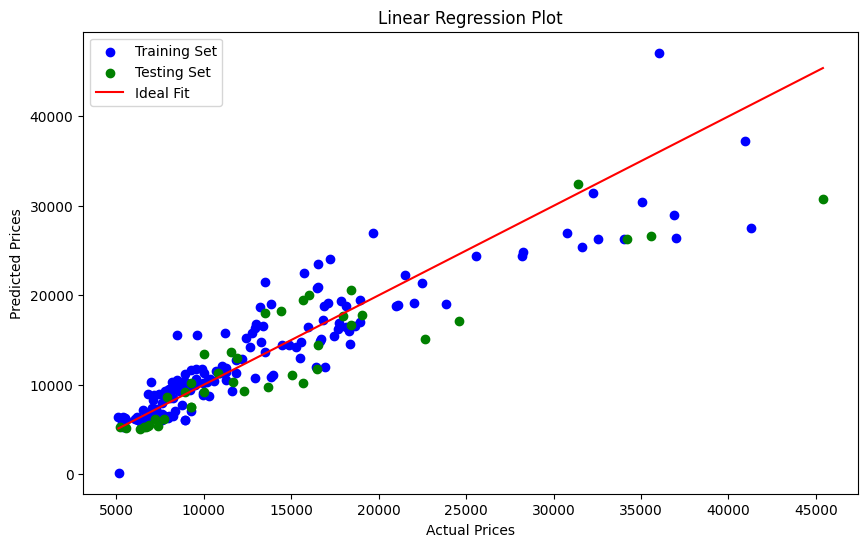

In [184]:
# Remove NaN values from training and testing datasets
train_plot_df = pd.DataFrame({'Actual': Y_train, 'Predicted': model.predict(X_train)}).dropna()
test_plot_df = pd.DataFrame({'Actual': Y_test, 'Predicted': test_predictions}).dropna()

# Plot the regression plot
plt.figure(figsize=(10, 6))
plt.scatter(train_plot_df['Actual'], train_plot_df['Predicted'], color='blue', label='Training Set')
plt.scatter(test_plot_df['Actual'], test_plot_df['Predicted'], color='green', label='Testing Set')
plt.plot([min(Y_train.min(), Y_test.min()), max(Y_train.max(), Y_test.max())], 
         [min(Y_train.min(), Y_test.min()), max(Y_train.max(), Y_test.max())], 
         color='red', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

In [185]:
# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Mean Absolute Error
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# R-squared Score
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Convert testing DataFrame to NumPy arrays
Y_test_np = Y_test.values

# Making predictions on the testing dataset
test_predictions = model.predict(X_test.values)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test_np, test_predictions)
mae = mean_absolute_error(Y_test_np, test_predictions)
r2 = r2_score(Y_test_np, test_predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²) Score: {r2}')

Mean Squared Error (MSE): 16661734.936503679
Mean Absolute Error (MAE): 2895.6247989794538
R-squared (R²) Score: 0.7851286217648347
